# 20201116 Intein model exploration

## Goals
* explore how a titrating 2-species binding system will act in different regimes
* parameters of interest
    * expression level of each half
    * $K_D$ of the binding interactions

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from ipywidgets import interact
import ipywidgets as widgets
import pandas as pd

Assumptions:
- bound intein is proportional to sigma factor produced
- sigma factor produced is proportional to output observed
- therefore, looking at fraction bound of intein

Main function to look at parameter space (fraction of intein system bound), where $A_T$ is total amount of prey half, $B_T$ is total amount of bait half, and $K_d$ is their dissociation constant. From (http://people.reed.edu/~glasfeld/Chem391/notes/ChLigand_2015.pdf)

$$[A:B] = \frac{[A] + [B] + K_d - \sqrt{([A] + [B] + K_d)^2 - 4[A] [B]}}{2}$$

Spread out:
$$[A:B] = \frac{[A] + [B] + K_d - \sqrt{[A]^2 + [B]^2 + K_d^2 +2[A]K_d + 2[B]K_d - 2[A] [B]}}{2}$$

Solved for $K_d$:

$$ K_d =  \frac{AB}{A:B} - A -B + A:B$$

* Note: this is the standard ligand binding curve except without the assumption that the receptor is much lower in concentration than the $K_d$
    * you can get to the standard $\frac{[A:B]}{B_T} = \frac{A}{A+K_d}$ by taking the limit as $B \rightarrow 0$ (yes this requires you to L'Hospital)

## Look at the standard binding curve

### Single Kd curve

In [ ]:
def bind_curve(b = 1e-7, k=1e-9, a_lower = 1e-10, a_upper = 1e-6, window_st = 1e-10):
    a = np.logspace(-10, -2, 100) # calculate prey concentrations
    
    f = ((a+b+k) - ((a+b+k)**2-4*a*b)**(1/2))/(2)
    
    y_low = 1e-10
    y_high = 1e-6
    
    plt.plot(a, f)
    plt.ylabel('Total [A:B]')
    plt.xlabel('Total Prey')
    plt.xlim(a_lower,a_upper)
    plt.ylim(y_low,y_high)
    plt.xscale('log')
    plt.yscale('log')
    
    # Plot a 100-fold induction window for prey
    plt.vlines(x = window_st,ymin = y_low, ymax = y_high)
    plt.vlines(x = window_st + 100*window_st,ymin = y_low, ymax = y_high)
    
    return plt.figure()


In [ ]:
interact(bind_curve, b = widgets.FloatLogSlider(value = 1e-7,base = 10, min = -10, max = -5, description = 'Total Bait', readout_format = '.2e' ),
         k = widgets.FloatLogSlider(value = 1e-6,base = 10, min = -10, max = -4, description = '$K_D$',readout_format = '.2e'  ),
         a_lower = widgets.FloatLogSlider(value = 1e-10,base = 10, min = -10, max = -4, description = 'Lower $[A]$',readout_format = '.2e'),
         a_upper = widgets.FloatLogSlider(value = 1e-6,base = 10, min = -10, max = -4, description = 'Upper $[A]$',readout_format = '.2e'  ),
         window_st = widgets.FloatLogSlider(value = 1e-9,base = 10, min = -10, max = -4, description = '100-fold window',readout_format = '.2e'))

plt.show()

### Multiple Kd curve

In [ ]:
def mult_bind_curve(b = 1e-7, a_lower = 1e-10, a_upper = 1e-6, window_st = 1e-10):
    
    y_low = 1e-11
    y_high = 1e-6
    

    kds = np.logspace(-11,-4,8)

    for k in kds:

        a = np.logspace(-10, -2, 200) # calculate prey concentrations

        f = ((a+b+k) - ((a+b+k)**2-4*a*b)**(1/2))/(2)

        plt.plot(a, f, linewidth = 3)
        plt.ylabel('Steady-state [A:B] (M)')
        plt.xlabel('Steady-state [A] (M)')
        plt.xlim(a_lower,a_upper)
        plt.ylim(y_low,y_high)
        plt.xscale('log')
        plt.yscale('log')
    
    # Plot a 100-fold induction window for prey
    plt.vlines(x = window_st,ymin = y_low, ymax = y_high)
    plt.vlines(x = window_st + 100*window_st,ymin = y_low, ymax = y_high)

    plt.legend(['{:.2e}'.format(x) for x in list(kds)], title = 'Prey-bait $K_d$ (M)', loc = 'upper right', bbox_to_anchor=(1.3, 0.8))
    
    return plt.figure()

In [ ]:
interact(mult_bind_curve, 
         b = widgets.FloatLogSlider(value = 1e-8,base = 10, min = -10, max = -5, description = 'Total Bait', readout_format = '.2e' ),
         a_lower = widgets.FloatLogSlider(value = 1e-10,base = 10, min = -10, max = -4, description = 'Lower $[A]$',readout_format = '.2e'),
         a_upper = widgets.FloatLogSlider(value = 1e-4,base = 10, min = -10, max = -4, description = 'Upper $[A]$',readout_format = '.2e'  ),
        window_st = widgets.FloatLogSlider(value = 1e-8,base = 10, min = -10, max = -4, description = '100-fold window',readout_format = '.2e'))

### Finding 1: replicated a regime in which expression only depends on prey, not bait
* this is similar to regime shown in the manuscript figure 1d
    * increasing expression of bait half only changes the output of the system at the lowest end of the induction curve

Application to our systems:
* this may not actually be the regime we are doing selections in with regards to bait expression. These data are from an entirely different bait construct Andrew made

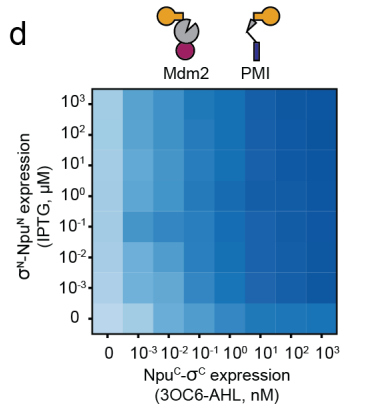

Set K_d to 1e-9. Look at bait ranges between 1e-7 and 1e-5. Expression is only dependent on prey because there is so much bait it is not getting saturated.

In [ ]:
interact(mult_bind_curve, 
         b = widgets.FloatLogSlider(value = 1e-7,base = 10, min = -10, max = -5, description = 'Total Bait', readout_format = '.2e' ),
         k = widgets.FloatLogSlider(value = 1e-9,base = 10, min = -10, max = -4, description = '$K_D$',readout_format = '.2e'  ),
         a_lower = widgets.FloatLogSlider(value = 1e-10,base = 10, min = -10, max = -4, description = 'Lower $[A]$',readout_format = '.2e'),
         a_upper = widgets.FloatLogSlider(value = 1e-4,base = 10, min = -10, max = -4, description = 'Upper $[A]$',readout_format = '.2e'  ),
         window_st = widgets.FloatLogSlider(value = 1e-9,base = 10, min = -10, max = -4, description = '100-fold window',readout_format = '.2e'))

plt.show()

### Finding 2: Minimum value of prey differentiates $K_d$ values, but maximum value of prey doesn't
* this is what we observed in the PMI variants

Application to our system
* this is likely the regime we're in (for bait at least) given that the bait is on the C-terminus of the protein, changing it to Mdm2 probably doesn't change expression very much
* however, the prey expression levels may be quite different since the pap leader is different than the PMI variants at the N-term

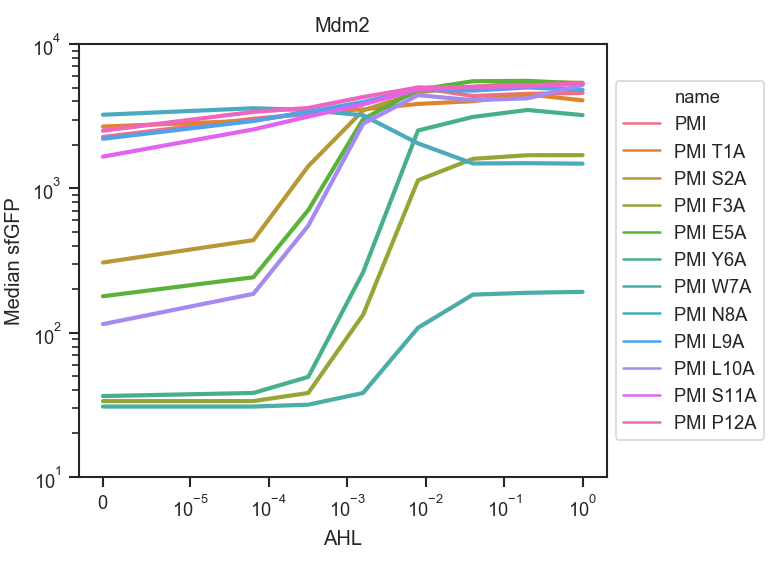

Look at $K_D$ values between 1e-9 -> 1e-5. Observe how tight binders completely saturate the system across all prey expression levels, while weaker binder can be resolved by looking at the lowest level of prey expression.

In [ ]:
interact(mult_bind_curve, 
         b = widgets.FloatLogSlider(value = 1e-8,base = 10, min = -10, max = -5, description = 'Total Bait', readout_format = '.2e' ),
         k = widgets.FloatLogSlider(value = 1e-9,base = 10, min = -10, max = -4, description = '$K_D$',readout_format = '.2e'  ),
         a_lower = widgets.FloatLogSlider(value = 1e-10,base = 10, min = -10, max = -4, description = 'Lower $[A]$',readout_format = '.2e'),
         a_upper = widgets.FloatLogSlider(value = 1e-4,base = 10, min = -10, max = -4, description = 'Upper $[A]$',readout_format = '.2e'  ),
        window_st = widgets.FloatLogSlider(value = 1e-8,base = 10, min = -10, max = -4, description = '100-fold window',readout_format = '.2e'))

plt.show()

#### Plot binding curves with a bunch of different $K_d$ values to illustrate

In [ ]:
kds = np.logspace(-10,-5,8)

plt.figure(dpi = 125)

for k in kds:

    a = np.logspace(-10, -2, 200) # calculate prey concentrations
    b = 1e-8
    
    f = ((a+b+k) - ((a+b+k)**2-4*a*b)**(1/2))/(2)

    plt.plot(a, f, linewidth = 3)
    plt.ylabel('Steady-state [A:B] (M)')
    plt.xlabel('Steady-state [A] (M)')
    #plt.xlim(0,1e-7)
    plt.ylim(0,1.1e-8)
    plt.xlim(1e-9,1e-5)
    plt.xscale('log')
    #plt.yscale('log')

plt.legend(['{:.2e}'.format(x) for x in list(kds)], title = 'Prey-bait $K_d$ (M)', loc = 'upper right', bbox_to_anchor=(1.3, 0.8))


### Finding 3: Dropping the overall prey expression (looking at a lower 100-fold range) allows us to differentiate stronger binders at the high end

Application to our system
* we could have a range of prey expressions (controlled by BCDs perhaps) where we can select for different binding ranges
    * perhaps start with a system that can find 1uM binders, then diversify and drop expression to find 1nM binders
* or we could just try a range of different expression levels and do selections at each and see which survives.

Look at prey expression between 1e-8 and 1e-6 (100 fold range):
* as we saw above, this doesn't differentiate most $K_d$ values at the high end of the expression range

Now move prey expression down 10-fold to 1e-9 to 1e-7:
* 

In [ ]:
interact(mult_bind_curve, 
         b = widgets.FloatLogSlider(value = 1e-8,base = 10, min = -10, max = -5, description = 'Total Bait', readout_format = '.2e' ),
         k = widgets.FloatLogSlider(value = 1e-7,base = 10, min = -10, max = -4, description = '$K_D$',readout_format = '.2e'  ),
         a_lower = widgets.FloatLogSlider(value = 1e-10,base = 10, min = -10, max = -4, description = 'Lower $[A]$',readout_format = '.2e'),
         a_upper = widgets.FloatLogSlider(value = 1e-4,base = 10, min = -10, max = -4, description = 'Upper $[A]$',readout_format = '.2e'),
         window_st = widgets.FloatLogSlider(value = 1e-9,base = 10, min = -10, max = -4, description = '100-fold window',readout_format = '.2e'))

plt.show()

### Finding 4: Given the same amount of bait as the PMI system, any range of prey expression (that shows a high and low signal), should be able to resolve binders as good as PMI

Assumptions:
- bait expression is the same as in the PMI system (in this model... 1e-8)
- starting at a rough prey window parameterized by results seen in the PMI work
- we do in fact see dynamic range above non-specific signal when inducing the hit

To see it:
- set 100-fold window to start at 1e-8
- move the window up 10-fold from 1e-8 (equivalent to 10-fold higher tl rates)
    - should see that tight binders will start to be high output even when uninduced
- now move the window down 10-fold from 1e-8 (equivalent to 10-fold lower tl rates of prey)
    - should see that tight binders won't peg the system at the low end anymore
    - but these are very tight binders! (equivalent to PMI)

In [ ]:
interact(mult_bind_curve, 
         b = widgets.FloatLogSlider(value = 1e-8,base = 10, min = -10, max = -5, description = 'Total Bait', readout_format = '.2e' ),
         a_lower = widgets.FloatLogSlider(value = 1e-10,base = 10, min = -10, max = -4, description = 'Lower $[A]$',readout_format = '.2e'),
         a_upper = widgets.FloatLogSlider(value = 1e-4,base = 10, min = -10, max = -4, description = 'Upper $[A]$',readout_format = '.2e'  ),
        window_st = widgets.FloatLogSlider(value = 1e-8,base = 10, min = -10, max = -4, description = '100-fold window',readout_format = '.2e'))

## Takeaways
* The best way to select for better binders than the current pap2c hit might be to just not express it... it looks like good binders should pop up at the low range of this based off the PMI data
* this idea is also validated by the E12A mutant in the RBD hit, which may have improved binding
* in order to get better binders than PMI, we'd have to reduce the bait expression (and prey expression)

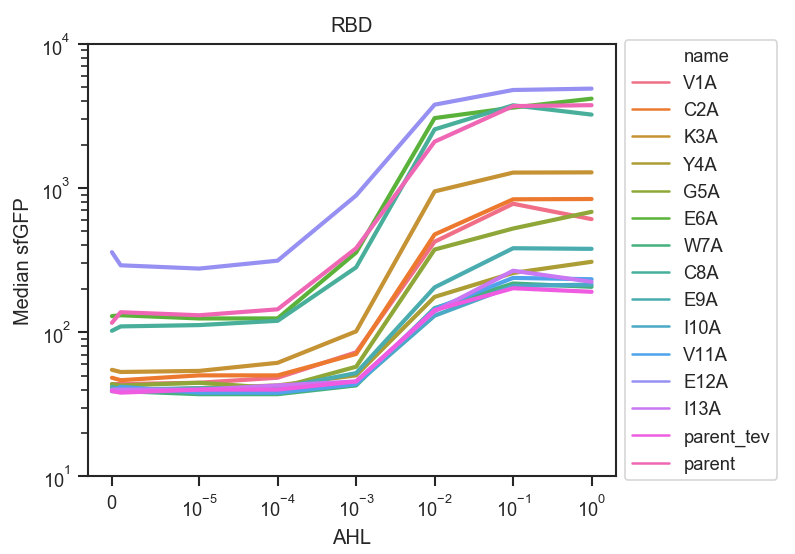

### Caveats
* it could be that we need to standardize expression across the pap leader and pmi system (if pap leader expression is too low, we might not actually be able to resolve this)
* also should note that the data shown below is in the backbone with the extra LuxR copy... the PMI data is all without the extra LuxR
    * so, the pap2c may have leakier expression




## Questions / next steps
* is there a reason to tune the bait half?
* how do we expect to incorporate non-specific activity into this?
* devise a metric to quantify differentation between binding strengths

### Derive an approximation of Kd
* will require assumptions since i dont think it's explicity solvable

## Possible model additions
* pipe it through the pLux transfer function
    * this would give a minimum transcription level (so the curve flattens on the low end)
    * and a maximum value
* add a non-specific intein splicing value (so the curve goes up a little bit on the high end)
    * this would be a separate reaction independent of bait / prey Kd (just another bimolecular reaction)
    * just dependent on prey and bait levels
    * looked into this... I don't think there's a way of independently specifying a non-specific KD and a specific KD without knowing kinetic rates

Commit change check

## Model w/ minimum tx and plotting $K_D$s

Shows the saturation of the system at low transcription:

$$[A:B] = min + \frac{[A] + [B] + K_d - \sqrt{([A] + [B] + K_d)^2 - 4[A] [B]}}{2}$$

In [ ]:
def mult_bind_curve_min(b = 1e-7, a_lower = 1e-10, a_upper = 1e-6, window_st = 1e-10, minim = 1e-9):
    
    y_low = 1e-11
    y_high = 1e-6
    
    kds = np.logspace(-11,-4,8)

    for k in kds:

        a = np.logspace(-10, -2, 200) # calculate prey concentrations

        out =  minim + ((a+b+k) - ((a+b+k)**2-4*a*b)**(1/2))/(2)

        plt.plot(a, out, linewidth = 3)
        plt.ylabel('Steady-state [A:B] (M)')
        plt.xlabel('Steady-state [A] (M)')
        plt.xlim(a_lower,a_upper)
        plt.ylim(y_low,y_high)
        plt.xscale('log')
        plt.yscale('log')
    
    # Plot a 100-fold induction window for prey
    plt.vlines(x = window_st,ymin = y_low, ymax = y_high)
    plt.vlines(x = window_st + 100*window_st,ymin = y_low, ymax = y_high)

    plt.legend(['{:.2e}'.format(x) for x in list(kds)], title = 'Prey-bait $K_d$ (M)', loc = 'upper right', bbox_to_anchor=(1.3, 0.8))
    
    return plt.figure()

In [ ]:
interact(mult_bind_curve_min, 
         b = widgets.FloatLogSlider(value = 1e-8,base = 10, min = -10, max = -5, description = 'Total Bait', readout_format = '.2e' ),
         a_lower = widgets.FloatLogSlider(value = 1e-10,base = 10, min = -10, max = -4, description = 'Lower $[A]$',readout_format = '.2e'),
         a_upper = widgets.FloatLogSlider(value = 1e-4,base = 10, min = -10, max = -4, description = 'Upper $[A]$',readout_format = '.2e'  ),
        window_st = widgets.FloatLogSlider(value = 1e-8,base = 10, min = -10, max = -4, description = '100-fold window',readout_format = '.2e'),
        minim = widgets.FloatLogSlider(value = 1e-9,base = 10, min = -10, max = -4, description = 'Min',readout_format = '.2e'))

## Plot [A:B] as a function of $K_d$
Derived from a symbolic solve below. Including a minimum tx value.

In [ ]:
def kd_plot(b = 1e-8, minim = 1e-9):
    
    y_low = 1e-11
    y_high = 1e-6
    
    k = np.logspace(-11,-3,100)
    
    a_s = np.logspace(-11,-4,8)
    
    for a in a_s:
        
        ab = minim+ ((a+b+k) - ((a+b+k)**2-4*a*b)**(1/2))/(2)

        plt.plot(k, ab, linewidth = 3)
        plt.ylabel('Steady-state [A:B] (M)')
        plt.xlabel('$K_d$ [M]')
        plt.xlim(1e-10,1e-3)
        plt.ylim(y_low,y_high)
        plt.xscale('log')
        plt.yscale('log')
    

    plt.legend(['{:.2e}'.format(a) for a in list(a_s)], title = 'Prey ($[A]$) (M)', loc = 'upper right', bbox_to_anchor=(1.3, 0.8))
    
    return plt.figure()

In [ ]:
interact(kd_plot, 
         b = widgets.FloatLogSlider(value = 1e-8,base = 10, min = -10, max = -5, description = 'Total Bait', readout_format = '.2e' ),
        minim = widgets.FloatLogSlider(value = 1e-10,base = 10, min = -11, max = -4, description = 'Min',readout_format = '.2e'))

### Analysis
* this plot replicates our results quite nicely actually
* assume minimum AHL = 1e-8 prey expression and max AHL = 1e-6 prey expression
* low prey expression differentiates 1e-9 -> 1e-6
* high prey expression differentiates 1e-6 -> 1e-4

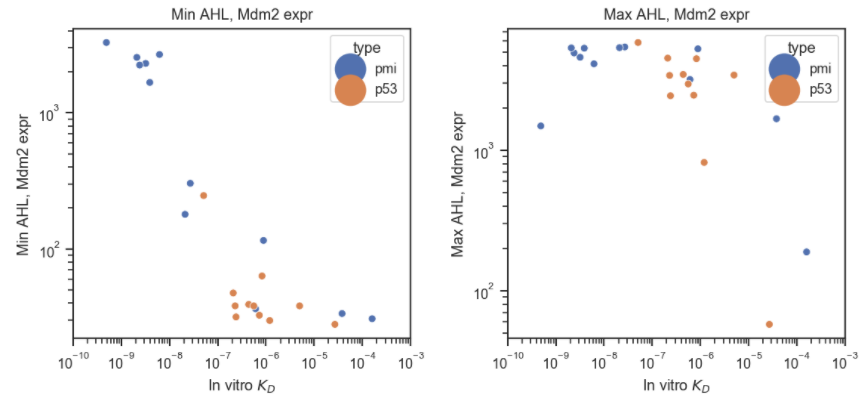

#### Plot just the two ends of the range

In [ ]:

minim = 1e-10
y_low = 1e-11
y_high = 1e-7

k = np.logspace(-11,-3,100)

a_s = np.array([1e-8, 1e-6])

for a in a_s:

    ab = minim + ((a+b+k) - ((a+b+k)**2-4*a*b)**(1/2))/(2)

    plt.plot(k, ab, linewidth = 3)
    plt.ylabel('Steady-state [A:B] (M)')
    plt.xlabel('$K_d$ [M]')
    plt.xlim(1e-10,1e-3)
    plt.ylim(y_low,y_high)
    plt.xscale('log')
    plt.yscale('log')


plt.legend(['{:.2e}'.format(a) for a in list(a_s)], title = 'Prey ($[A]$) (M)', loc = 'upper right', bbox_to_anchor=(1.3, 0.8))

# Fitting

### If we were to do a fit... how many free variables would there be?

$$Y (K_d) = min +  C*(\frac{[A] + [B] + K_d - \sqrt{([A] + [B] + K_d)^2 - 4[A] [B]}}{2})$$

- $min$ and $a$ defined by observed fluorescence values (where does it max out, $C$, and whats the minimum fluorescence, $min$)
- $[A]$ and $[B]$ would be fixed parameters that would have to be fit
    - with different values of expression, we could relate different values of $[A]$
        - for example: low AHL prey is $[A]$ and high AHL prey is $100*[A]$
        - would we be able to minimize the fits at the same time?

In [ ]:
import pandas as pd
import scipy
import matplotlib
import seaborn as sns

In [ ]:
matplotlib.rc('figure', dpi = 125)
sns.set_style('ticks')

In [ ]:
## Get the dataframe exported from flow analysis 20201119
df = pd.read_pickle('../data/pmi_p53_combined.pkl')
df = df.dropna()
df

In [ ]:
def kd_func(k, minim, C, a, b):
    y = minim+ C*((a+b+k) - ((a+b+k)**2-4*a*b)**(1/2))/(2)
    return y

In [ ]:
xdata = (df['kd'].values)
ydata = (df['Min AHL, Mdm2 expr'].values)

print(xdata)
print(ydata)

In [ ]:
# Fit it
popt, pcov = scipy.optimize.curve_fit(kd_func, xdata, ydata, bounds = (0,np.inf), p0 = [30, 3e11, 2e-8, 2e-8])
popt

In [ ]:
# lets plot em
fig, ax = plt.subplots(figsize = (4,4))

# First plot the real data
sns.scatterplot(x = xdata, y = ydata, hue = 'type', data =df, ax = ax)


# Then plot the fit
ks = np.logspace(-10,-3,100)
y = kd_func(ks, *popt)

sns.lineplot(x = ks, y = y, ax = ax)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-10,1e-3)
ax.set_ylim(1e1,1e4)

ax.set_xlabel('In vitro $K_D$')

# Sensitivity analysis (TODO)
* this would be a good, rigorous way to prove that we'd expect the results from the p53 system to apply to the mdm2 system
    * this is the main argument for the benefit of the model
* want to show that despite not knowing two specific parameters of the mdm2 system (bait expression and Kds), we'd expect this system to function the same as the p53 system (w/ known Kds)

## Thoughts on how to do this

### Metric that is insensitive to unknowns, but still has relevance to if we can find better binders
* need to first find a metric that captures the general shape of the output function, or something of interest
    * maybe fold-change of output for a given 100-fold change in input?
        * seems reasonable since we'd always expect a ~100-fold change in prey expression via the lux promoter
    * Probably something else is better
* PDE sensitivity analysis on analytical solution for circuit output (or the metric of interest)
    * first differentiate the output function with respect to unknown parameters
        * there's some normalization factor here too, i forget exactly how it works
    * then show that the output (or metric) is insensitive to all reasonable values of unknown variables


# Symbolic math stuff

## Finding the max difference between Kds
We want to maximize $\frac{[A:B]_2}{[A:B]_1}= f$ w.r.t. $\frac{K_1}{K_2} = a$. In words: we want to maximize the fold-difference between the output for 2 different $K_d$ values for a given set of $A$ and $B$

### Approach:
Set up the equation for $f$, substitute in $a$ and try to take the partial derivative of it. Then set it to zero and solve....

In [ ]:
import math
import sympy

In [ ]:
# Define variables for the equation

C, f, A, B, K_1, K_2, a, m = sympy.symbols('C, f, A, B, K_1, K_2, a, m')

In [ ]:
# Define the equation
ratio_eqn = (A + B + K_2 - sympy.sqrt((A+B+K_2)**2 -4*A*B)) / (A + B + K_2*a - sympy.sqrt((A+B+K_2*a)**2 -4*A*B))

In [ ]:
ratio_eqn

In [ ]:
# Differentiate wrt a
sympy.diff(ratio_eqn,a)

 This.... is too complex. I can't really get anything from this. think we need more constraints

### Recreate solving the [A:B] equation for K

In [ ]:
ab_eqn = sympy.Eq(C, (A + B + K_1 - sympy.sqrt((A+B+K_1)**2 -4*A*B))/2)
ab_eqn

In [ ]:
sympy.solveset(ab_eqn, K_1)

#### Solving with a min

In [ ]:
ab_min = sympy.Eq(C,  (m +(A + B + K_1 - sympy.sqrt((A+B+K_1)**2 -4*A*B))/2))
sympy.solveset(ab_min, K_1)